***WildFire Detection System Using CNN***


**Importing libraries and connecting drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Importing libraries
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.utils import np_utils
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import callbacks
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/forest_fire

/content/drive/MyDrive/forest_fire


**Data Pre-Processing**

In [ ]:
# Spliting the training and testing data
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("/content/drive/MyDrive/forest_fire/Training and Validation/",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory("/content/drive/MyDrive/forest_fire/Testing/",
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary')

Found 1832 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


**Classes:**

In [ ]:
test_dataset.class_indices

{'fire': 0, 'nofire': 1}

**Model:**

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(Dropout(0.15))
model.add(keras.layers.Dense(1,activation='sigmoid'))

**Model Compilation**

In [ ]:
# It is time to compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
elst= callbacks.EarlyStopping( monitor="val_loss",
    min_delta=0.00001,
    patience=4,
    verbose=1,
    mode="auto", baseline=None)
save_ck= callbacks.ModelCheckpoint ('.mdl_wts.hdf5',  restore_best_weights=False,  mode="auto")
# let's get the model fit. 
history = model.fit(train_dataset, epochs = 20, validation_data = test_dataset, verbose=1, callbacks=[elst , save_ck])


Epoch 1/20
58/58 [==============================] - 344s 6s/step - loss: 0.2607 - accuracy: 0.8908 - val_loss: 0.2868 - val_accuracy: 0.9118
Epoch 2/20
58/58 [==============================] - 6s 108ms/step - loss: 0.1422 - accuracy: 0.9547 - val_loss: 0.2624 - val_accuracy: 0.9412
Epoch 3/20
58/58 [==============================] - 6s 98ms/step - loss: 0.1280 - accuracy: 0.9574 - val_loss: 0.2461 - val_accuracy: 0.8971
Epoch 4/20
58/58 [==============================] - 6s 101ms/step - loss: 0.1151 - accuracy: 0.9651 - val_loss: 0.2230 - val_accuracy: 0.8971
Epoch 5/20
58/58 [==============================] - 6s 100ms/step - loss: 0.0974 - accuracy: 0.9722 - val_loss: 0.2948 - val_accuracy: 0.9265
Epoch 6/20
58/58 [==============================] - 7s 112ms/step - loss: 0.0782 - accuracy: 0.9771 - val_loss: 0.1114 - val_accuracy: 0.9559
Epoch 7/20
58/58 [==============================] - 6s 98ms/step - loss: 0.0662 - accuracy: 0.9798 - val_loss: 0.1097 - val_accuracy: 0.9559
Epoch 8/2

**Making Predictions**



```
# This is formatted as code
```





In [ ]:
predictions = model.predict(test_dataset)
predictions = np.round(predictions)
predictions

3/3 [==============================] - 0s 52ms/step


array([[0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [ ]:
print(len(predictions))

68


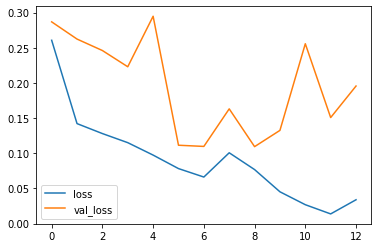

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

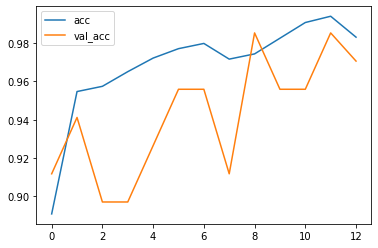

In [ ]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
import keras.utils as image
# This helps in taking individual images from the Dataset, load and check results. 
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        plt.xlabel("No Fire",fontsize=30)
    elif val == 0:
        plt.xlabel("Fire",fontsize=30)

1/1 [==============================] - 0s 183ms/step
[[0.]]


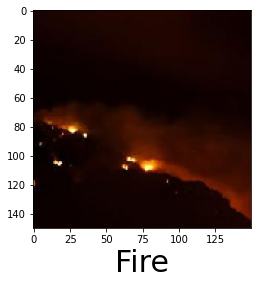

In [ ]:
predictImage("/content/drive/MyDrive/forest_fire/Testing/fire/abc172.jpg")

1/1 [==============================] - 0s 16ms/step
[[0.]]


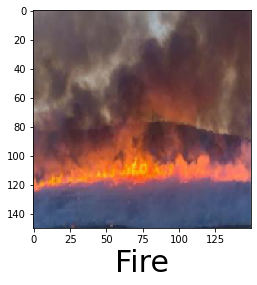

In [ ]:
predictImage("/content/drive/MyDrive/forest_fire/Testing/fire/abc178.jpg")

1/1 [==============================] - 0s 17ms/step
[[1.]]


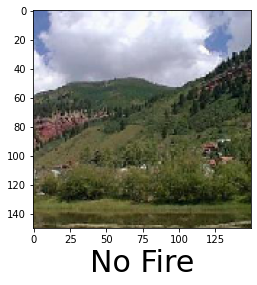

In [ ]:
predictImage("/content/drive/MyDrive/forest_fire/Testing/nofire/abc346.jpg")

1/1 [==============================] - 0s 14ms/step
[[1.]]


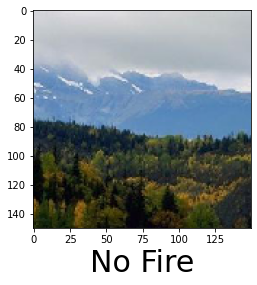

In [ ]:
predictImage("/content/drive/MyDrive/forest_fire/Testing/nofire/abc348.jpg")

1/1 [==============================] - 0s 23ms/step
[[0.]]


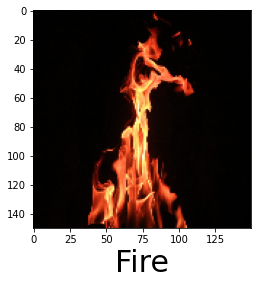

In [ ]:
predictImage("1.jpg")

1/1 [==============================] - 0s 14ms/step
[[1.]]


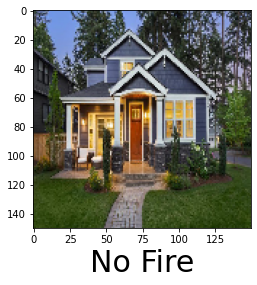

In [ ]:
predictImage("2.jpg")

1/1 [==============================] - 0s 15ms/step
[[0.]]


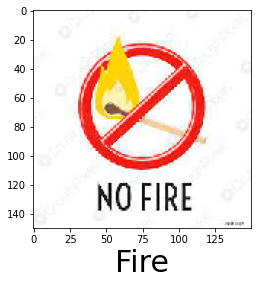

In [ ]:
predictImage("3.jpg")

1/1 [==============================] - 0s 17ms/step
[[0.]]


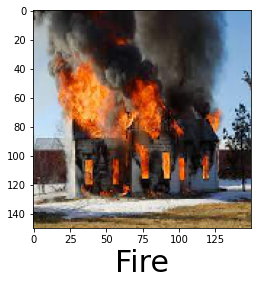

In [ ]:
predictImage("4.jpg")

1/1 [==============================] - 0s 18ms/step
[[0.]]


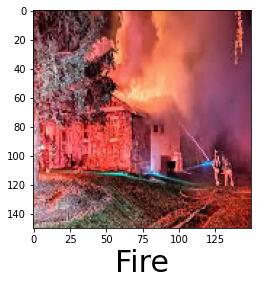

In [ ]:
predictImage("5.jpg")